##   EDA OF A SUPERMARKET DATASET

<!--  Numerical features may be there (histogram or pdf)
 categorical features
 missing values (visulize the graph)
 outliers (box plots)
 cleaning of raw data
CONVERTING RAW DATA INTO USEFUL DATA -->


In [227]:
import pandas as pd
import pandas_profiling

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
import scipy

from scipy.stats import pearsonr
from sklearn import preprocessing

In [7]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.shape

(1000, 17)

In [12]:
df.drop('Tax 5%',axis=1,inplace=True)

In [13]:
df.drop(['Invoice ID','Time','gross margin percentage'],axis=1,inplace=True)

In [15]:
df2=(df.drop([    
                  'Rating',
                  'gross income',
                  'cogs',
                  'Unit price',
                 'Quantity',
                  'Total',
                'Date'],axis=1))
var=list(df2.columns)
var

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

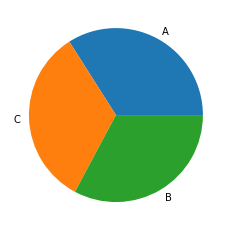

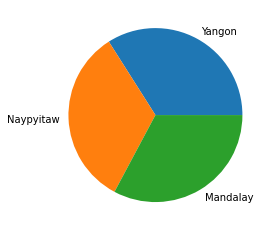

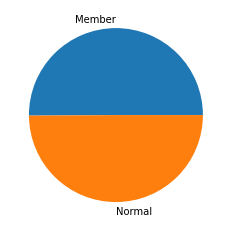

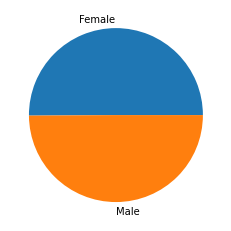

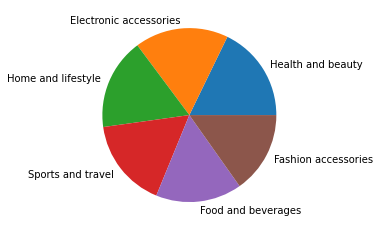

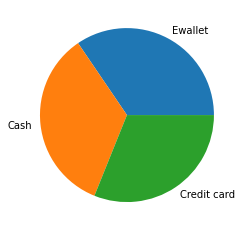

In [17]:
%matplotlib inline
for i in var:
    plt.pie(df[i].value_counts(normalize=True),labels=df2[i].unique())
    plt.show()

## From the above pie charts we realize that the all the categorical variables of this dataset are balanced

## Univariate analysis for non categorical variables

### 5 number summary

In [18]:
np.std(df['Total'])

245.76236168237725

In [19]:
print(np.std(df['Total']))
print(df['Total'].max())
print(df['Total'].min())
print(np.quantile(df['Total'],0.25))
print(np.quantile(df['Total'],0.50))
print(np.quantile(df['Total'],0.75))

245.76236168237725
1042.65
10.6785
124.422375
253.848
471.35024999999996


In [20]:
iqr=np.quantile(df['Total'],0.75)-np.quantile(df['Total'],0.25)
lower_outlier=np.quantile(df['Total'],0.25)-1.5*iqr

upper_outlier=np.quantile(df['Total'],0.75)+1.5*iqr
print(upper_outlier)
print(lower_outlier)

991.7420625
-395.9694375


In [21]:
len(df[df['Total']>991])

9

<AxesSubplot:>

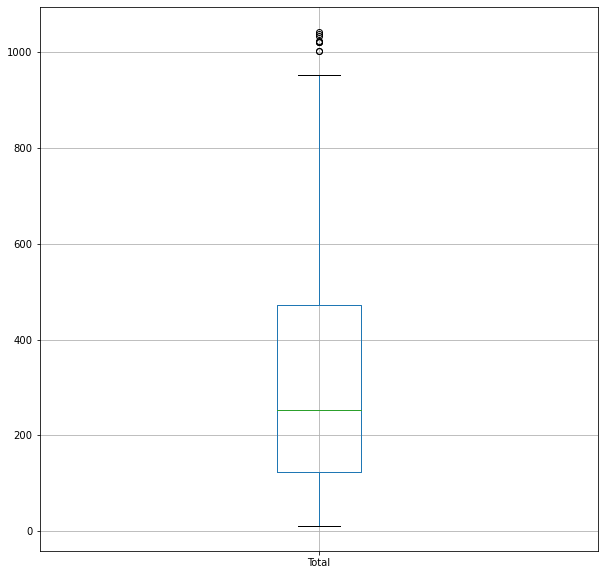

In [22]:
df.boxplot(column=['Total'],figsize=(10,10))

In [23]:
s=scipy.stats.skew(df['Total'])
s

0.8912303920037631

# From the above boxplot we can say that most of the customers have purchased in the lower total cost range. Customers who have purchased abovcve 991.742 are considered to be outliers and there are 9 of them in this dataset which is why it has a skewness of 0.89

### Bivariate analysis

In [24]:
df['Quantity'].value_counts()

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

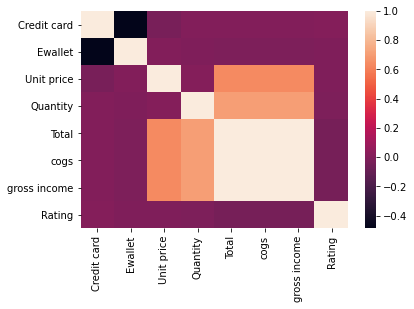

In [47]:
corrmat = df.corr()
hm = sns.heatmap(corrmat)

In [26]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

## applying label encoding to payment variable

In [41]:
df1=pd.get_dummies(df['Payment'],drop_first=True)

In [42]:
df=pd.concat([df1,df],axis=1)

In [43]:
df.head()

,Credit card,Ewallet,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Payment,cogs,gross income,Rating
0,0,1,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1
1,0,0,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,Cash,76.40,3.8200,9.6
2,1,0,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4
3,0,1,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,0,1,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3


In [44]:
df.drop('Payment',axis=1,inplace=True)

In [46]:
df.head()

,Credit card,Ewallet,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,cogs,gross income,Rating
0,0,1,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,522.83,26.1415,9.1
1,0,0,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,76.40,3.8200,9.6
2,1,0,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,324.31,16.2155,7.4
3,0,1,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,465.76,23.2880,8.4
4,0,1,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,604.17,30.2085,5.3


In [55]:
label_encoder = preprocessing.LabelEncoder()
df['City']=label_encoder.fit_transform(df['City'])

In [82]:
label_encoder = preprocessing.LabelEncoder()
df['Branch']=label_encoder.fit_transform(df['Branch'])

In [83]:
label_encoder = preprocessing.LabelEncoder()
df['Customer type']=label_encoder.fit_transform(df['Customer type'])

In [84]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [85]:
label_encoder = preprocessing.LabelEncoder()
df['Product line']=label_encoder.fit_transform(df['Product line'])

In [87]:
df.head()

,Credit card,Ewallet,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,cogs,gross income,Rating
0,0,1,0,2,0,0,3,74.69,7,548.9715,1/5/2019,522.83,26.1415,9.1
1,0,0,2,1,1,0,0,15.28,5,80.2200,3/8/2019,76.40,3.8200,9.6
2,1,0,0,2,1,1,4,46.33,7,340.5255,3/3/2019,324.31,16.2155,7.4
3,0,1,0,2,0,1,3,58.22,8,489.0480,1/27/2019,465.76,23.2880,8.4
4,0,1,0,2,1,1,5,86.31,7,634.3785,2/8/2019,604.17,30.2085,5.3


In [106]:
for i in range(0,df.shape[0]):
#     print(i)
    df['month'][i]=df['Date'][i][0]

<ipython-input-106-278c51a12752>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][i]=df['Date'][i][0]


In [108]:
df.drop('Date',axis=1,inplace=True)

In [172]:
df.head()

,Credit card,Ewallet,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,cogs,gross income,Rating,month
0,0,1,0,2,0,0,3,74.69,7,548.9715,522.83,26.1415,9.1,1
1,0,0,2,1,1,0,0,15.28,5,80.2200,76.40,3.8200,9.6,3
2,1,0,0,2,1,1,4,46.33,7,340.5255,324.31,16.2155,7.4,3
3,0,1,0,2,0,1,3,58.22,8,489.0480,465.76,23.2880,8.4,1
4,0,1,0,2,1,1,5,86.31,7,634.3785,604.17,30.2085,5.3,2


## unit price does not have much significance so it is removed

In [173]:
df.drop('Unit price',axis=1,inplace=True)

### doing univariate analysis on month

In [111]:
df['month'].value_counts()

1    352
3    345
2    303
Name: month, dtype: int64

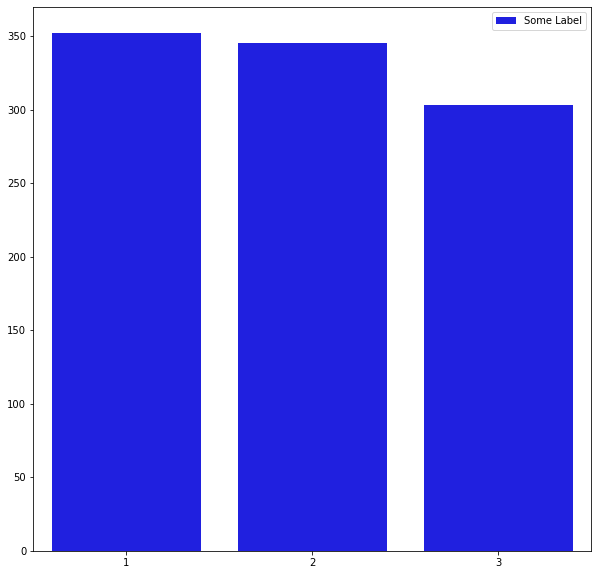

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
# x and y are lists
sns.barplot(x=[1,2,3],y=[352,345,303], color='blue', ax=ax, label="Some Label")

ax.legend()
plt.show()

#### There has been slight decrease in sales from januaray to march

## bivariate analysis on month and total

In [164]:
s1=df[df['month']=='1']['Total'].sum()
s2=df[df['month']=='2']['Total'].sum()
s3=df[df['month']=='3']['Total'].sum()
# df2['Total'].sum()

lis=[s1,s2,s3]


month=['jan','feb','mar']


<AxesSubplot:>

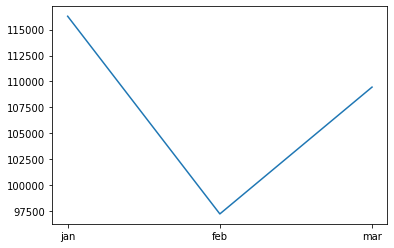

In [165]:

sns.lineplot(x=month,y=lis)

### there has been a decrease in sale and then increase in march

## Bivariate analysis on month and Rating

In [189]:
for i in range(0,df.shape[0]):
    df['new_rating'][i]=int(round(df['Rating'][i],0))

<ipython-input-189-b45c64938372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_rating'][i]=int(round(df['Rating'][i],0))


In [217]:
df.drop('Rating',axis=1,inplace=True)

In [190]:
df.head()

,Credit card,Ewallet,Branch,City,Customer type,Gender,Product line,Quantity,Total,cogs,gross income,Rating,month,new_rating
0,0,1,0,2,0,0,3,7,548.9715,522.83,26.1415,9.1,1,9.0
1,0,0,2,1,1,0,0,5,80.2200,76.40,3.8200,9.6,3,10.0
2,1,0,0,2,1,1,4,7,340.5255,324.31,16.2155,7.4,3,7.0
3,0,1,0,2,0,1,3,8,489.0480,465.76,23.2880,8.4,1,8.0
4,0,1,0,2,1,1,5,7,634.3785,604.17,30.2085,5.3,2,5.0


7.036931818181818 7.075907590759076 6.823188405797102


<AxesSubplot:>

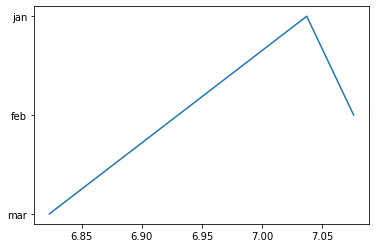

In [203]:
m1=df[df['month']=='1']['new_rating'].mean()
m2=df[df['month']=='2']['new_rating'].mean()
m3=df[df['month']=='3']['new_rating'].mean()

# lis_month=['jan','feb','mar']
print(m1,m2,m3)

lis=[m1,m2,m3]

sns.lineplot(x=lis,y=month)

### Not much difference in rating over the 3 months

### Bivariate analysis on customer type and Rating

In [230]:
coeff, _ = scipy.stats.spearmanr(df['Customer type'], df['new_rating'])

In [231]:
coeff

0.011395733063176724

### There is also no correlation between customer membership type and the rating that they give

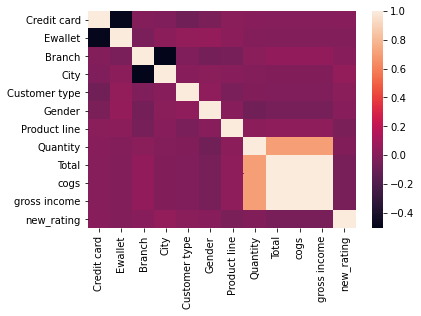

In [232]:
corrmat = df.corr()
hm = sns.heatmap(corrmat)

In [239]:
coeff, _ = scipy.stats.spearmanr(df['Quantity'], df['gross income'])

## Branch and city are highly correlated hence one of them is removed

In [238]:
df.drop('Branch',axis=1,inplace=True)

### similarly quantity cogs and  total are highly correlated so quantity and cogs are removed

In [241]:
df.drop(['Quantity','cogs'],axis=1,inplace=True)

In [243]:
df.head()

,Credit card,Ewallet,City,Customer type,Gender,Product line,Total,gross income,month,new_rating
0,0,1,2,0,0,3,548.9715,26.1415,1,9.0
1,0,0,1,1,0,0,80.2200,3.8200,3,10.0
2,1,0,2,1,1,4,340.5255,16.2155,3,7.0
3,0,1,2,0,1,3,489.0480,23.2880,1,8.0
4,0,1,2,1,1,5,634.3785,30.2085,2,5.0


## product line and total

In [245]:
list(df['Product line'].value_counts())

[178, 174, 170, 166, 160, 152]

In [249]:
df['Product line'].value_counts()

1    178
2    174
0    170
5    166
4    160
3    152
Name: Product line, dtype: int64

In [258]:
p1=df[df['Product line']==0]['Total'].sum()
p2=df[df['Product line']==1]['Total'].sum()
p3=df[df['Product line']==2]['Total'].sum()
p4=df[df['Product line']==3]['Total'].sum()
p5=df[df['Product line']==4]['Total'].sum()
p6=df[df['Product line']==5]['Total'].sum()
print(p1,p2,p3,p4,p5,p6)

lis2=[p1,p2,p3,p4,p5,p6]
lis2p=['0','1','2','3','4','5']

54337.53150000001 54305.895000000004 56144.844000000005 49193.739 53861.913 55122.82650000001


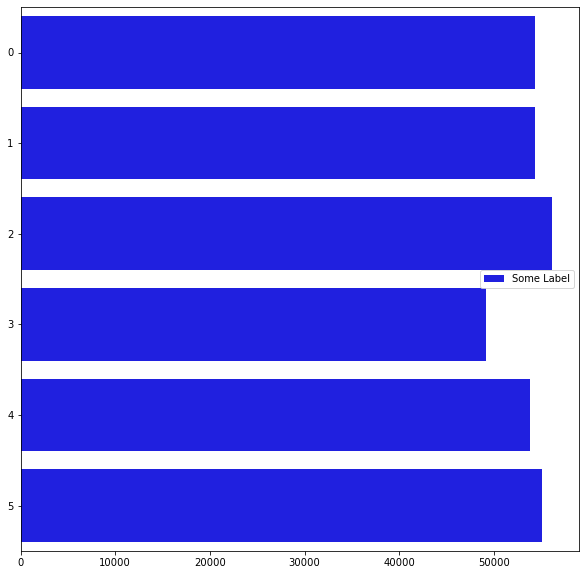

In [259]:
fig, ax = plt.subplots(figsize=(10,10))
# x and y are lists
sns.barplot(x=lis2,y=lis2p, color='blue', ax=ax, label="Some Label")

ax.legend()
plt.show()

# CONCLUSION

## There is no relation between the customer type and rating that they give.The qunatityof goods sold has slightly decreased from jan to feb and the total sales has decreased significantly from jan to feb but has increased again in march

## Also most of the customers are for small purchases the total cost each customer has barely exceded 991